<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from functools import reduce
from collections import defaultdict
from scipy import stats

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'app_wau.csv',
 'lead_conversion.csv',
 '1_customers_dataset.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 'sample-sales-data.csv',
 'sales_vs_discount.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'bz_data_analyis.csv',
 'online_retail_II.xlsx',
 '1_orders_dataset.csv',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'cookie_cats.csv',
 'sales_data_with_stores.csv',
 'ab_experiment.csv',
 'test.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'scanner_data.csv',
 'match_result_test.csv',
 'mock_sales_data.csv',
 'mall_customers.csv',
 'sample_data']

In [4]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [7]:
cnt = pd.melt(df, id_vars = ['version', 'sum_gamerounds','userid'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version', 'retention', 'result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt.head()

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


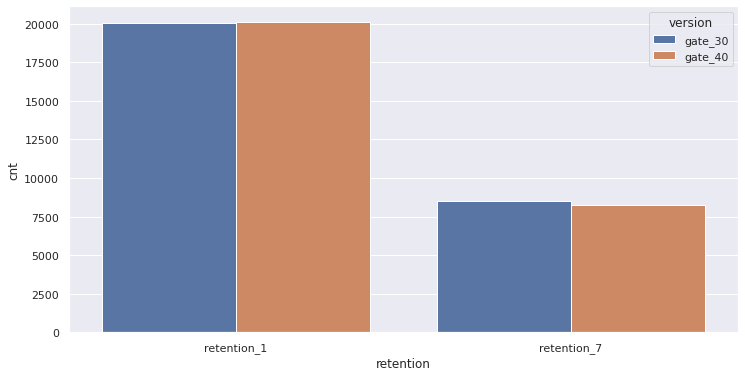

In [13]:
sns.set(rc ={'figure.figsize':(12,6)})
sns.barplot(data = cnt, x = 'retention', y = 'cnt', hue = 'version')
plt.show()

In [14]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat), '\n', str(p))

66146621.50561835 
 0.0


In [15]:
n = 1000
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,52.495353,47.307943
sum_gamerounds,49.263300,51.128396
sum_gamerounds,52.672844,48.670976
sum_gamerounds,48.268197,53.211296
sum_gamerounds,49.106614,52.418631


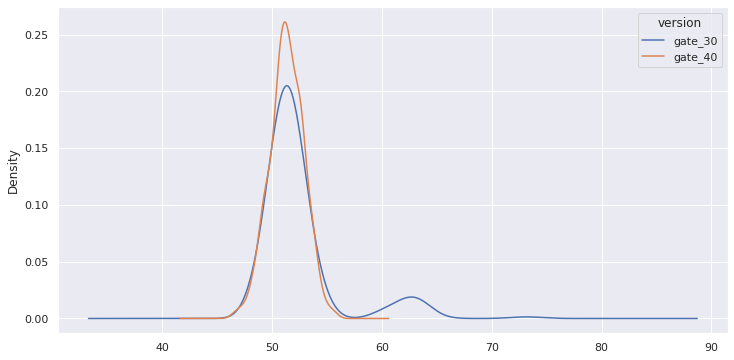

In [16]:
boots.plot.kde()

In [17]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff > 0])/n

0.544

# Iterators

In [18]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [19]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}